In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import dask.dataframe as dd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
df_total = pd.read_csv('DarshanTotal_top10_huge.csv')
df_total

In [4]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 213 entries, Unnamed: 0 to total_ALL_BYTES
dtypes: float64(60), int64(141), object(12)
memory usage: 60.0+ KB


In [4]:
print(df_total.columns.get_loc("Science"))

206


In [5]:
df_total.dtypes

Unnamed: 0                   int64
darshan_log_version        float64
exe                         object
uid                          int64
jobid                        int64
                            ...   
total_ALL_F_WRITE_TIME     float64
total_ALL_F_META_TIME      float64
total_ALL_BYTES_WRITTEN    float64
total_ALL_BYTES_READ       float64
total_ALL_BYTES            float64
Length: 213, dtype: object

# SelectKBest

Here we compare the methods of feature ranking - SelectKBest vs Mutual Information. SelectKBest needs to specify the "k" important features that needs to be ranked. For our use-case, we do not know "k".  

In [48]:
# Create feature and target variable for Classification problem
#X_clf=df_total.iloc[:,3:198] # features: exe to num_nodes

#X_clf=df_total.iloc[:,3:198] # features: exe to num_nodes
#num = X_clf._get_numeric_data()
#num[num < 0] = 0

X_clf=X_clf.select_dtypes(exclude='object')

X_clf[X_clf < 0] = 0
y_clf=df_total.iloc[:,206] # Target variable: Science

<ipython-input-48-d99aab46d673>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clf[X_clf < 0] = 0
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [49]:
#clf = SelectKBest()
clf = SelectKBest(score_func=f_classif, k=30)
X_test_new=clf.fit_transform(X_clf,y_clf)
params = clf.get_params()

/opt/conda/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 13  15  44  71  72  73  74  88  89  90  91 117 118 119 120 127 128 129
 168 169 170 171 185 186 187 188] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [11]:
cols = clf.get_support(indices=True) #to get a boolean mask of the selected features
features_df_new = X_clf.iloc[:,cols]
features_large = features_df_new.columns.values
print(features_large)

['total_POSIX_OPENS' 'total_POSIX_FILENOS' 'total_POSIX_READS'
 'total_POSIX_STATS' 'total_POSIX_BYTES_READ' 'total_POSIX_BYTES_WRITTEN'
 'total_POSIX_MAX_BYTE_READ' 'total_POSIX_MAX_BYTE_WRITTEN'
 'total_POSIX_SEQ_READS' 'total_POSIX_FILE_NOT_ALIGNED'
 'total_POSIX_MAX_WRITE_TIME_SIZE' 'total_POSIX_STRIDE1_STRIDE'
 'total_POSIX_STRIDE2_STRIDE' 'total_POSIX_STRIDE3_STRIDE'
 'total_POSIX_STRIDE4_STRIDE' 'total_POSIX_ACCESS1_ACCESS'
 'total_POSIX_ACCESS2_ACCESS' 'total_STDIO_OPENS' 'total_STDIO_READS'
 'total_STDIO_WRITES' 'total_STDIO_SEEKS' 'total_STDIO_FLUSHES'
 'total_STDIO_BYTES_WRITTEN' 'total_STDIO_BYTES_READ'
 'total_STDIO_MAX_BYTE_READ' 'total_STDIO_MAX_BYTE_WRITTEN'
 'total_STDIO_FASTEST_RANK_BYTES' 'total_STDIO_SLOWEST_RANK_BYTES'
 'total_MPIIO_BYTES_READ' 'total_MPIIO_MAX_READ_TIME_SIZE']


In [13]:
feat_importances = pd.Series(clf.scores_, index=X_clf.columns)
topFatures = feat_importances.nlargest(30).copy().index.values
print(topFatures)
print(feat_importances)

['total_POSIX_BYTES_WRITTEN' 'total_POSIX_BYTES_READ'
 'total_STDIO_BYTES_READ' 'total_STDIO_BYTES_WRITTEN' 'total_STDIO_READS'
 'total_STDIO_WRITES' 'total_MPIIO_BYTES_READ' 'total_POSIX_MAX_BYTE_READ'
 'total_STDIO_FLUSHES' 'total_POSIX_MAX_BYTE_WRITTEN'
 'total_POSIX_STRIDE3_STRIDE' 'total_POSIX_STRIDE2_STRIDE'
 'total_POSIX_STRIDE1_STRIDE' 'total_POSIX_STRIDE4_STRIDE'
 'total_STDIO_MAX_BYTE_READ' 'total_POSIX_ACCESS1_ACCESS'
 'total_POSIX_MAX_WRITE_TIME_SIZE' 'total_STDIO_MAX_BYTE_WRITTEN'
 'total_STDIO_FASTEST_RANK_BYTES' 'total_STDIO_SLOWEST_RANK_BYTES'
 'total_POSIX_ACCESS2_ACCESS' 'total_STDIO_OPENS' 'total_POSIX_STATS'
 'total_MPIIO_MAX_READ_TIME_SIZE' 'total_POSIX_FILE_NOT_ALIGNED'
 'total_POSIX_READS' 'total_POSIX_SEQ_READS' 'total_POSIX_FILENOS'
 'total_POSIX_OPENS' 'total_STDIO_SEEKS']
uid                                  1.888895e+05
jobid                                1.345452e+06
start_time                           3.806920e+05
end_time                             3.8

In [45]:
df_total_huge = pd.read_csv('DarshanTotal_top10_huge.csv')
print(df_total_huge.shape)
# Create feature and target variable for Classification problem
X_clf=df_total_huge.select_dtypes(exclude='object')# features: all numerical data
X_clf[X_clf < 0] = 0
y_clf=df_total_huge.iloc[:,206] # Target variable: Science
#clf = SelectKBest()
clf = SelectKBest(score_func=chi2, k=30)
X_test_new=clf.fit_transform(X_clf,y_clf)
cols = clf.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]
features_huge = features_df_new.columns.values
print(features_huge)

(36, 213)
['total_POSIX_READS' 'total_POSIX_STATS' 'total_POSIX_BYTES_READ'
 'total_POSIX_BYTES_WRITTEN' 'total_POSIX_MAX_BYTE_READ'
 'total_POSIX_MAX_BYTE_WRITTEN' 'total_POSIX_SEQ_READS'
 'total_POSIX_FILE_NOT_ALIGNED' 'total_POSIX_MAX_WRITE_TIME_SIZE'
 'total_POSIX_STRIDE1_STRIDE' 'total_POSIX_STRIDE2_STRIDE'
 'total_POSIX_STRIDE3_STRIDE' 'total_POSIX_STRIDE4_STRIDE'
 'total_POSIX_ACCESS1_ACCESS' 'total_POSIX_ACCESS2_ACCESS'
 'total_STDIO_OPENS' 'total_STDIO_READS' 'total_STDIO_WRITES'
 'total_STDIO_FLUSHES' 'total_STDIO_BYTES_WRITTEN'
 'total_STDIO_BYTES_READ' 'total_STDIO_MAX_BYTE_READ'
 'total_STDIO_MAX_BYTE_WRITTEN' 'total_STDIO_FASTEST_RANK_BYTES'
 'total_STDIO_SLOWEST_RANK_BYTES' 'total_MPIIO_BYTES_READ'
 'total_MPIIO_MAX_READ_TIME_SIZE' 'total_ALL_BYTES_WRITTEN'
 'total_ALL_BYTES_READ' 'total_ALL_BYTES']


<ipython-input-45-fd4f79332565>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clf[X_clf < 0] = 0
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [13]:
df_total_medium = pd.read_csv('DarshanTotal_top12_medium.csv')
print(df_total_medium.shape)
# Create feature and target variable for Classification problem
X_clf=df_total_medium.select_dtypes(exclude='object')# features: all numerical data
X_clf[X_clf < 0] = 0
y_clf=df_total_medium.iloc[:,206] # Target variable: Science
#clf = SelectKBest()
clf = SelectKBest(score_func=chi2, k=30)
X_test_new=clf.fit_transform(X_clf,y_clf)
cols = clf.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]
features_medium = features_df_new.columns.values
print(features_medium)

(474132, 213)


<ipython-input-13-6c97c42494f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clf[X_clf < 0] = 0
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


['total_POSIX_RENAMED_FROM' 'total_POSIX_BYTES_READ'
 'total_POSIX_BYTES_WRITTEN' 'total_POSIX_MAX_BYTE_READ'
 'total_POSIX_MAX_BYTE_WRITTEN' 'total_POSIX_MAX_READ_TIME_SIZE'
 'total_POSIX_MAX_WRITE_TIME_SIZE' 'total_POSIX_STRIDE1_STRIDE'
 'total_POSIX_STRIDE2_STRIDE' 'total_POSIX_STRIDE3_STRIDE'
 'total_POSIX_STRIDE4_STRIDE' 'total_POSIX_ACCESS1_ACCESS'
 'total_STDIO_BYTES_WRITTEN' 'total_STDIO_BYTES_READ'
 'total_STDIO_MAX_BYTE_READ' 'total_STDIO_MAX_BYTE_WRITTEN'
 'total_STDIO_FASTEST_RANK_BYTES' 'total_STDIO_SLOWEST_RANK_BYTES'
 'total_MPIIO_BYTES_READ' 'total_MPIIO_BYTES_WRITTEN'
 'total_MPIIO_MAX_READ_TIME_SIZE' 'total_MPIIO_MAX_WRITE_TIME_SIZE'
 'total_MPIIO_SIZE_READ_AGG_0_100' 'total_MPIIO_SIZE_READ_AGG_100K_1M'
 'total_MPIIO_ACCESS1_ACCESS' 'total_MPIIO_ACCESS2_ACCESS'
 'total_MPIIO_ACCESS4_ACCESS' 'total_ALL_BYTES_WRITTEN'
 'total_ALL_BYTES_READ' 'total_ALL_BYTES']


In [14]:
df_total_small = pd.read_csv('DarshanTotal_top13_small.csv')
print(df_total_small.shape)
# Create feature and target variable for Classification problem
X_clf=df_total_small.select_dtypes(exclude='object')# features: all numerical data
X_clf[X_clf < 0] = 0
y_clf=df_total_small.iloc[:,206] # Target variable: Science
#clf = SelectKBest()
clf = SelectKBest(score_func=chi2, k=30)
X_test_new=clf.fit_transform(X_clf,y_clf)
cols = clf.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]
features_small = features_df_new.columns.values
print(features_small)

(2403534, 213)


<ipython-input-14-543636ec30e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clf[X_clf < 0] = 0
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


['total_POSIX_RENAMED_FROM' 'total_POSIX_BYTES_READ'
 'total_POSIX_BYTES_WRITTEN' 'total_POSIX_MAX_BYTE_READ'
 'total_POSIX_MAX_BYTE_WRITTEN' 'total_POSIX_MAX_READ_TIME_SIZE'
 'total_POSIX_SIZE_READ_10K_100K' 'total_POSIX_SIZE_WRITE_0_100'
 'total_POSIX_STRIDE3_STRIDE' 'total_POSIX_STRIDE4_STRIDE'
 'total_POSIX_ACCESS3_ACCESS' 'total_POSIX_ACCESS4_ACCESS'
 'total_STDIO_READS' 'total_STDIO_FLUSHES' 'total_STDIO_BYTES_WRITTEN'
 'total_STDIO_BYTES_READ' 'total_STDIO_MAX_BYTE_READ'
 'total_STDIO_MAX_BYTE_WRITTEN' 'total_STDIO_FASTEST_RANK_BYTES'
 'total_STDIO_SLOWEST_RANK_BYTES' 'total_MPIIO_BYTES_READ'
 'total_MPIIO_BYTES_WRITTEN' 'total_MPIIO_MAX_READ_TIME_SIZE'
 'total_MPIIO_MAX_WRITE_TIME_SIZE' 'total_MPIIO_ACCESS2_ACCESS'
 'total_MPIIO_ACCESS3_ACCESS' 'total_MPIIO_ACCESS4_ACCESS'
 'total_ALL_BYTES_WRITTEN' 'total_ALL_BYTES_READ' 'total_ALL_BYTES']


In [15]:
df_total_tiny = pd.read_csv('DarshanTotal_top10_tiny.csv')
print(df_total_tiny.shape)
# Create feature and target variable for Classification problem
X_clf=df_total_tiny.select_dtypes(exclude='object')# features: all numerical data
X_clf[X_clf < 0] = 0
y_clf=df_total_tiny.iloc[:,206] # Target variable: Science
#clf = SelectKBest()
clf = SelectKBest(score_func=chi2, k=30)
X_test_new=clf.fit_transform(X_clf,y_clf)
cols = clf.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]
features_tiny = features_df_new.columns.values
print(features_tiny)

(2748849, 213)


<ipython-input-15-5985f46d3954>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clf[X_clf < 0] = 0
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


['total_POSIX_OPENS' 'total_POSIX_DUPS' 'total_POSIX_READS'
 'total_POSIX_WRITES' 'total_POSIX_SEEKS' 'total_POSIX_STATS'
 'total_POSIX_FSYNCS' 'total_POSIX_FDSYNCS' 'total_POSIX_RENAME_TARGETS'
 'total_POSIX_RENAMED_FROM' 'total_POSIX_BYTES_WRITTEN'
 'total_POSIX_MAX_BYTE_READ' 'total_POSIX_MAX_BYTE_WRITTEN'
 'total_POSIX_CONSEC_READS' 'total_POSIX_SEQ_READS'
 'total_POSIX_SEQ_WRITES' 'total_POSIX_MAX_READ_TIME_SIZE'
 'total_POSIX_SIZE_READ_0_100' 'total_POSIX_SIZE_READ_100_1K'
 'total_POSIX_SIZE_READ_10M_100M' 'total_POSIX_SIZE_WRITE_10M_100M'
 'total_POSIX_ACCESS1_ACCESS' 'total_POSIX_ACCESS3_ACCESS'
 'total_STDIO_MAX_BYTE_READ' 'total_STDIO_MAX_BYTE_WRITTEN'
 'total_STDIO_FASTEST_RANK_BYTES' 'total_STDIO_SLOWEST_RANK_BYTES'
 'total_ALL_BYTES_WRITTEN' 'total_ALL_BYTES_READ' 'total_ALL_BYTES']


In [16]:
common_features = list(set.intersection(*map(set, [features_tiny, features_small, features_medium, features_large, features_huge])))
print(common_features)

['total_STDIO_SLOWEST_RANK_BYTES', 'total_ALL_BYTES_WRITTEN', 'total_POSIX_MAX_BYTE_READ', 'total_STDIO_MAX_BYTE_WRITTEN', 'total_STDIO_FASTEST_RANK_BYTES', 'total_STDIO_MAX_BYTE_READ', 'total_ALL_BYTES', 'total_ALL_BYTES_READ', 'total_POSIX_BYTES_WRITTEN', 'total_POSIX_MAX_BYTE_WRITTEN']


In [ ]:
union_features = list(set(features_tiny) | set(features_small) | set(features_medium) | set(features_large) | set(features_huge))
print(union_features)
print(len(union_features))

# Mutual Information

In [3]:
# Create feature and target variable for Classification problem

#X_clf=df_total.select_dtypes(exclude='object')

X=df_total.iloc[:,3:198] # features: exe to num_nodes
num = X._get_numeric_data()
num[num < 0] = 0

#X[X < 0] = 0

y=df_total.iloc[:,206] # Target variable: Science

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [4]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

job_id                              0.838991
total_POSIX_BYTES_READ              0.826655
start_time_asci                     0.819423
end_time_asci                       0.818603
total_POSIX_BYTES_WRITTEN           0.810649
                                      ...   
total_MPIIO_SLOWEST_RANK_BYTES      0.000000
total_POSIX_SLOWEST_RANK_BYTES      0.000000
total_POSIX_FASTEST_RANK            0.000000
total_MPIIO_F_VARIANCE_RANK_TIME    0.000000
total_MPIIO_NB_READS                0.000000
Name: MI Scores, Length: 65, dtype: float64

In [5]:
mi_scores.to_csv("mi_scores_tiny.csv")

In [4]:
mi_scores = pd.read_csv("mi_scores_huge.csv")
mi_scores

,Unnamed: 0,MI Scores
0,total_STDIO_BYTES_WRITTEN,1.501843
1,total_STDIO_WRITES,1.501843
2,total_STDIO_OPENS,1.501843
3,exename,1.501843
4,total_STDIO_FASTEST_RANK,1.501843
...,...,...
190,total_MPIIO_SIZE_WRITE_AGG_10M_100M,0.000000
191,total_MPIIO_SIZE_WRITE_AGG_100M_1G,0.000000
192,total_MPIIO_SIZE_WRITE_AGG_1G_PLUS,0.000000
193,total_STDIO_F_FASTEST_RANK_TIME,0.000000


In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8,12))
plot_mi_scores(mi_scores[:50])
plt.savefig('huge_mutualInfo_top50.png',bbox_inches='tight',dpi=200)

# FEATURE ENGINEERING

Added new features to the datasets - Node hours, read fraction, write fraction, metadata fraction for all the three I/O interfaces (POSIX/MPI-IO/STDIO).

In [ ]:
df_test = pd.read_csv('DarshanTotal_top12_medium.csv')
df_test

In [15]:
with open('features.txt') as f:
    features = f.read().splitlines()
    
print(features)

['nprocs', 'runtime', 'total_POSIX_OPENS', 'total_POSIX_FILENOS', 'total_POSIX_DUPS', 'total_POSIX_READS', 'total_POSIX_WRITES', 'total_POSIX_SEEKS', 'total_POSIX_STATS', 'total_POSIX_MMAPS', 'total_POSIX_FSYNCS', 'total_POSIX_FDSYNCS', 'total_POSIX_RENAME_SOURCES', 'total_POSIX_RENAME_TARGETS', 'total_POSIX_RENAMED_FROM', 'total_POSIX_MODE', 'total_POSIX_BYTES_READ', 'total_POSIX_BYTES_WRITTEN', 'total_POSIX_MAX_BYTE_READ', 'total_POSIX_MAX_BYTE_WRITTEN', 'total_POSIX_CONSEC_READS', 'total_POSIX_CONSEC_WRITES', 'total_POSIX_SEQ_READS', 'total_POSIX_SEQ_WRITES', 'total_POSIX_RW_SWITCHES', 'total_POSIX_MEM_NOT_ALIGNED', 'total_POSIX_MEM_ALIGNMENT', 'total_POSIX_FILE_NOT_ALIGNED', 'total_POSIX_FILE_ALIGNMENT', 'total_POSIX_MAX_READ_TIME_SIZE', 'total_POSIX_MAX_WRITE_TIME_SIZE', 'total_POSIX_SIZE_READ_0_100', 'total_POSIX_SIZE_READ_100_1K', 'total_POSIX_SIZE_READ_1K_10K', 'total_POSIX_SIZE_READ_10K_100K', 'total_POSIX_SIZE_READ_100K_1M', 'total_POSIX_SIZE_READ_1M_4M', 'total_POSIX_SIZE_RE

In [42]:
df_new = df_test[features]
num = df_new._get_numeric_data()
num[num < 0] = 0
df_new
print(df_new.head())

   nprocs  runtime  total_POSIX_OPENS  total_POSIX_FILENOS  total_POSIX_DUPS  \
0     336    20842           17341978               515573                 0   
1     336    20866           17355928               519332                 0   
2     336    20827            8617750               479630                 0   
3     336    20849           19802328               527042                 0   
4     336    20840           21388707               538925                 0   

   total_POSIX_READS  total_POSIX_WRITES  total_POSIX_SEEKS  \
0             996469              227278              14424   
1             998697              259719              14451   
2             995051              177587              14343   
3             997794              238935              14366   
4             994105              229486              14366   

   total_POSIX_STATS  total_POSIX_MMAPS  ...  total_MPIIO_FASTEST_RANK_BYTES  \
0              14977                  0  ...                

In [ ]:
df_new['node_hours'] = df_new['num_nodes'] * (df_new['runtime']/3600)

In [ ]:
df_new['POSIX_Read_Fraction'] = df_new['total_POSIX_F_READ_TIME']/df_new['runtime']
df_new['POSIX_Write_Fraction'] = df_new['total_POSIX_F_WRITE_TIME']/df_new['runtime']
df_new['POSIX_Meta_Fraction'] = df_new['total_POSIX_F_META_TIME']/df_new['runtime']
df_new['STDIO_Read_Fraction'] = df_new['total_STDIO_F_READ_TIME']/df_new['runtime']
df_new['STDIO_Write_Fraction'] = df_new['total_STDIO_F_WRITE_TIME']/df_new['runtime']
df_new['STDIO_Meta_Fraction'] = df_new['total_STDIO_F_META_TIME']/df_new['runtime']
df_new['MPIIO_Read_Fraction'] = df_new['total_MPIIO_F_READ_TIME']/df_new['runtime']
df_new['MPIIO_Write_Fraction'] = df_new['total_MPIIO_F_WRITE_TIME']/df_new['runtime']
df_new['MPIIO_Meta_Fraction'] = df_new['total_MPIIO_F_META_TIME']/df_new['runtime']
df_new['POSIX_IO_RATE']= (df_new['total_POSIX_BYTES_WRITTEN'] + df_new['total_POSIX_BYTES_READ'])/df_new['runtime']
df_new['STDIO_IO_RATE']= (df_new['total_STDIO_BYTES_WRITTEN'] + df_new['total_STDIO_BYTES_READ'])/df_new['runtime']
#df_new

In [ ]:
columns_to_drop = ['total_POSIX_F_READ_TIME', 'total_POSIX_F_WRITE_TIME', 'total_POSIX_F_META_TIME',\
                   'total_STDIO_F_META_TIME','total_STDIO_F_WRITE_TIME','total_STDIO_F_READ_TIME',\
                   'total_MPIIO_F_READ_TIME','total_MPIIO_F_WRITE_TIME','total_MPIIO_F_META_TIME']
df_new.drop(columns_to_drop, inplace=True, axis=1)


In [46]:
df_new

,nprocs,runtime,total_POSIX_OPENS,total_POSIX_FILENOS,total_POSIX_DUPS,total_POSIX_READS,total_POSIX_WRITES,total_POSIX_SEEKS,total_POSIX_STATS,total_POSIX_MMAPS,...,POSIX_Write_Fraction,POSIX_Meta_Fraction,STDIO_Read_Fraction,STDIO_Write_Fraction,STDIO_Meta_Fraction,MPIIO_Read_Fraction,MPIIO_Write_Fraction,MPIIO_Meta_Fraction,POSIX_IO_RATE,STDIO_IO_RATE
0,336,20842,17341978,515573,0,996469,227278,14424,14977,0,...,0.308279,0.341852,0.000050,0.006593,0.079380,9.571558,8.158861,0.249902,5.007560e+06,64138.635064
1,336,20866,17355928,519332,0,998697,259719,14451,15604,0,...,0.293617,0.307494,0.000047,0.007943,0.093532,10.883944,8.459373,0.309509,6.548556e+06,72781.651538
2,336,20827,8617750,479630,0,995051,177587,14343,10114,0,...,0.341203,0.336453,0.000049,0.004947,0.099749,8.408612,6.833789,0.220781,4.285812e+06,44745.585058
3,336,20849,19802328,527042,0,997794,238935,14366,16279,0,...,0.265195,0.265980,0.000047,0.005511,0.092066,10.375405,7.291554,0.240613,5.250778e+06,52961.627416
4,336,20840,21388707,538925,0,994105,229486,14366,17131,0,...,0.310315,0.332251,0.000044,0.005237,0.094014,7.951233,6.373717,0.231830,4.009763e+06,45704.516939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474127,624,96,85462,0,0,33844116,886,238246,312565,0,...,0.227870,1.364183,0.000000,0.012967,0.000000,0.000000,0.000000,0.000000,2.710301e+09,158600.000000
474128,400,10295,8534,0,0,67949,4842259,17591,23807,0,...,0.006101,0.194087,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,8.974530e+06,45.432346
474129,400,5388,8518,0,0,57480,3552496,17453,23759,0,...,0.008838,0.016203,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,9.100826e+06,86.623237
474130,400,3073,8576,0,0,52652,1898478,17284,23933,0,...,0.009719,0.045872,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,8.908069e+06,151.447120


In [47]:
df_new.to_csv('medium_featureEngg.csv',index = False)

In [48]:
#Normalize
scaler = MinMaxScaler() 
column_names_to_not_normalize = ['Science']
column_names_to_normalize = [x for x in list(df_new) if x not in column_names_to_not_normalize ]
x = df_new[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_new.index)
df_new[column_names_to_normalize] = df_temp
#df_new

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [49]:
X=df_new._get_numeric_data()

y=df_new['Science'] # Target variable: Science

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [50]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

total_POSIX_FILE_ALIGNMENT             0.116625
total_POSIX_WRITES                     0.059563
total_POSIX_STATS                      0.059323
total_STDIO_OPENS                      0.059204
STDIO_IO_RATE                          0.057802
total_STDIO_FLUSHES                    0.057206
total_STDIO_FASTEST_RANK_BYTES         0.056967
total_POSIX_SEQ_WRITES                 0.056898
total_STDIO_SEEKS                      0.056251
total_POSIX_SIZE_WRITE_100_1K          0.055585
total_POSIX_SIZE_WRITE_1K_10K          0.054801
total_POSIX_ACCESS4_COUNT              0.053794
total_MPIIO_ACCESS2_COUNT              0.053127
total_MPIIO_ACCESS1_COUNT              0.052408
total_MPIIO_INDEP_WRITES               0.050971
total_POSIX_SIZE_READ_100_1K           0.050574
total_POSIX_READS                      0.050288
total_POSIX_SEQ_READS                  0.050024
total_MPIIO_SIZE_WRITE_AGG_0_100       0.049044
total_MPIIO_SIZE_WRITE_AGG_100_1K      0.048518
total_MPIIO_MODE                       0

In [51]:
mi_scores.to_csv("mi_scores_FeatureEngg_medium.csv")

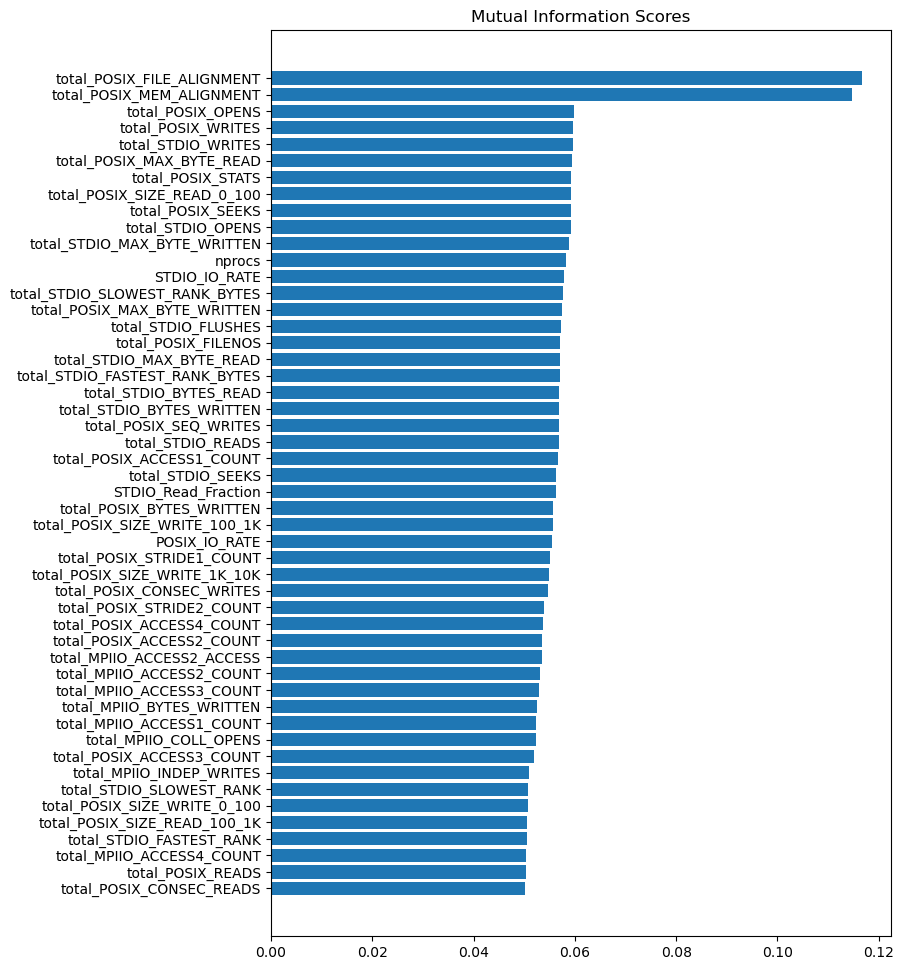

In [52]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8,12))
plot_mi_scores(mi_scores[:50])
plt.savefig('medium_mutualInfo_FeatureEngg_top50.png',bbox_inches='tight',dpi=200)

# CLUSTERING

To find how many features are needed for each scale, we use DBSCAN to check how mnay clusters we get by varying the number of features. The point where there is an elbow (number of clusters start decreasing by increasing the number of features) is what we decide as the number of features which represent the applications for that particular scale.

In [ ]:
df_test = pd.read_csv('DarshanTotal_top10_large.csv')
df_test

In [4]:
df_test1 = pd.read_csv('mi_scores_FeatureEngg_large.csv')
df_test1.head()
df_test2 = df_test1[df_test1['MI Scores'] > 0.01]  
features = df_test2['Unnamed: 0'].tolist()
features = features + ['Science']
features_25 = features[:25] + ['Science']
features_50 = features[:50] + ['Science']
features_60 = features[:60] + ['Science']
features_75 = features[:75] + ['Science']
print(features)

# with open('features_medium.txt') as f:
#     features = f.read().splitlines() 
 

['nprocs', 'total_POSIX_OPENS', 'total_STDIO_MAX_BYTE_WRITTEN', 'total_STDIO_OPENS', 'total_STDIO_BYTES_WRITTEN', 'total_POSIX_MAX_BYTE_READ', 'total_STDIO_WRITES', 'total_POSIX_FILE_NOT_ALIGNED', 'total_POSIX_ACCESS2_ACCESS', 'total_STDIO_MAX_BYTE_READ', 'total_STDIO_READS', 'total_POSIX_FILENOS', 'total_POSIX_ACCESS3_ACCESS', 'total_POSIX_MAX_READ_TIME_SIZE', 'total_STDIO_BYTES_READ', 'total_POSIX_MAX_BYTE_WRITTEN', 'total_POSIX_WRITES', 'total_POSIX_SEQ_WRITES', 'total_POSIX_SIZE_WRITE_0_100', 'total_POSIX_ACCESS4_ACCESS', 'total_POSIX_CONSEC_WRITES', 'total_POSIX_SIZE_WRITE_100_1K', 'num_nodes', 'total_POSIX_SIZE_READ_1K_10K', 'total_POSIX_SIZE_WRITE_1K_10K', 'total_POSIX_ACCESS4_COUNT', 'total_STDIO_SLOWEST_RANK_BYTES', 'total_STDIO_FASTEST_RANK_BYTES', 'total_POSIX_ACCESS2_COUNT', 'POSIX_Write_Fraction', 'STDIO_IO_RATE', 'POSIX_Read_Fraction', 'POSIX_Meta_Fraction', 'total_POSIX_ACCESS1_COUNT', 'total_POSIX_ACCESS3_COUNT', 'total_POSIX_F_MAX_READ_TIME', 'total_POSIX_MAX_WRITE_TIM

In [ ]:
num = df_test._get_numeric_data()
num[num < 0] = 0
df_test   

In [6]:
df_test['node_hours'] = df_test['num_nodes'] * (df_test['runtime']/3600)
df_test['POSIX_Read_Fraction'] = df_test['total_POSIX_F_READ_TIME']/df_test['runtime']
df_test['POSIX_Write_Fraction'] = df_test['total_POSIX_F_WRITE_TIME']/df_test['runtime']
df_test['POSIX_Meta_Fraction'] = df_test['total_POSIX_F_META_TIME']/df_test['runtime']
df_test['STDIO_Read_Fraction'] = df_test['total_STDIO_F_READ_TIME']/df_test['runtime']
df_test['STDIO_Write_Fraction'] = df_test['total_STDIO_F_WRITE_TIME']/df_test['runtime']
df_test['STDIO_Meta_Fraction'] = df_test['total_STDIO_F_META_TIME']/df_test['runtime']
df_test['MPIIO_Read_Fraction'] = df_test['total_MPIIO_F_READ_TIME']/df_test['runtime']
df_test['MPIIO_Write_Fraction'] = df_test['total_MPIIO_F_WRITE_TIME']/df_test['runtime']
df_test['MPIIO_Meta_Fraction'] = df_test['total_MPIIO_F_META_TIME']/df_test['runtime']
df_test['POSIX_IO_RATE']= (df_test['total_POSIX_BYTES_WRITTEN'] + df_test['total_POSIX_BYTES_READ'])/df_test['runtime']
df_test['STDIO_IO_RATE']= (df_test['total_STDIO_BYTES_WRITTEN'] + df_test['total_STDIO_BYTES_READ'])/df_test['runtime']

In [26]:
df_new = df_test[features_75]
num = df_new._get_numeric_data()
num[num < 0] = 0
df_new
print(df_new.head())

   nprocs  total_POSIX_OPENS  total_STDIO_MAX_BYTE_WRITTEN  total_STDIO_OPENS  \
0    6144           31324890                        210513             178426   
1    6144            1100206                        210513             791759   
2    6144             297062                        210513              31039   
3    6144              44745                        210513              30959   
4    6144              45025                        210513              30964   

   total_STDIO_BYTES_WRITTEN  total_POSIX_MAX_BYTE_READ  total_STDIO_WRITES  \
0                  626288034                 2097799184           102593635   
1                  633929246                   16549890           104253740   
2                  633929239                       1022           104253740   
3                  627611974                        996           102970604   
4                  627612227                    2468134           102970631   

   total_POSIX_FILE_NOT_ALIGNED  total

In [27]:
X=df_new._get_numeric_data()

y=df_new['Science'] # Target variable: Science


In [28]:
print(df_new['Science'].unique())

['Computer Science' 'Chemistry' 'Engineering' 'Physics' 'Earth Science'
 'Biology']


## DBSCAN

In [29]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [31]:
#Reducing the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.shape)

(85078, 2)


In [32]:
db = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels_75 = db.labels_

In [81]:
# print(list(set(labels) - set(labels)))

[]


In [13]:
print(np.unique(labels))#All features

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29]


In [14]:
print(len(labels.tolist()))

85078


In [105]:
print(labels_60.tolist())

[0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [20]:
print(np.unique(labels))#75 features

[-1  0  1  2  3  4]


In [21]:
print(labels)

[-1 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1 -1 -1  1  1  1  1  1  2  2  3  3
 -1  3  3  3 -1 -1 -1 -1  2  4  4  4]


In [22]:
print(np.unique(labels))#60 features

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29]


In [23]:
print(len(labels_60.tolist()))

85078


In [24]:
labels = labels.tolist()
label_60 = labels_60.tolist()

In [34]:
labels_75 = labels_75.tolist()

In [35]:
count = 0
for x in range(0,85078):
    if(labels[x]!=labels_75[x]):
        count = count+1
print(count)      

22872


In [54]:
print(labels)

[0 1 0 ... 0 0 0]


In [133]:
print(np.unique(labels))#50 features

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30]


In [125]:
print(np.unique(labels))#25 features

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52]


In [ ]:
lst = [x==y for x in labels.tolist() for y in labels_60.tolist()]

In [ ]:
lst.count(False)